In [31]:
import pandas as pd
import numpy as np
import os
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [2]:
path = '../data/'

In [3]:
# Read data on building features from the railbelt grid

building_features = pd.read_csv('../output/data_btu_railbelt.csv')

In [4]:
# Drop rows with missing btu values 
building_features_nonmissing = building_features.dropna()

In [5]:
# Create numpy arrays for scikit learn 

features_dropped = ['annual_btu_persqft', 'annual_btu', 'age', 'osm_id', 'zip_code', 'zip_group', 'age_yrs']
features_kept = building_features_nonmissing.drop(features_dropped, axis=1).columns

X = np.array(building_features_nonmissing.drop(features_dropped, axis=1))
y = np.array(building_features_nonmissing['annual_btu_persqft'])
y = y.reshape([y.shape[0],1])

In [6]:
# Scale X

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

print(X)

[[-2.36647622e-01 -1.36319468e+00  6.30103054e-01 ... -6.91183213e-01
   6.24785266e-01 -4.27196025e-01]
 [ 5.60365535e-01 -1.40887797e+00 -1.82141606e+00 ... -6.12882768e-02
  -1.83340954e+00 -8.28775438e-01]
 [-2.49227319e-01 -1.72916194e+00 -1.62415591e+00 ...  2.91711194e+00
  -1.64795878e+00  2.05128845e+00]
 ...
 [-1.89331561e-01 -1.43274316e-02  6.30103054e-01 ... -6.91183213e-01
   6.24785266e-01 -4.27196025e-01]
 [-1.53472145e-01 -4.06869950e-01  6.30103054e-01 ... -6.91183213e-01
   6.24785266e-01 -4.27196025e-01]
 [-2.72891665e-01 -6.33809416e-01 -2.43415856e-02 ...  1.69498701e+00
  -1.67554736e-03  1.67421160e+00]]


In [7]:
# Scale y

scaler = StandardScaler()
scaler.fit(y)
y = scaler.transform(y)

print(y)

[[-0.81007095]
 [ 0.79558361]
 [ 0.97646015]
 ...
 [-2.05842429]
 [-2.05842429]
 [-2.05842429]]


In [8]:
# Divide intro training and testing datasets, with a 30-70 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [9]:
# Linear Regression


lm = LinearRegression()
lm.fit(X_train,y_train)

y_pred_lm = lm.predict(X_test) # predicting using train dataset

coeffs = lm.coef_
print(coeffs)

[[ 5.54120833e-02 -1.14090826e-01 -2.14737520e+11  1.49743849e+12
  -7.73943677e+10  1.09568485e+12 -1.38491655e+11  1.96912560e+12
   7.25520117e+10 -4.74250549e+11 -8.00962089e+10  1.00878315e+12
   4.38122425e+11 -4.69206902e+12]]


In [10]:
# Ridge Regression

ridge = Ridge(alpha= 0.5)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
coeffs = ridge.coef_
print(coeffs)

[[ 0.05477184 -0.11559082 -0.77912365 -0.22402072  1.746955   -1.99298117
   1.99800218  0.60038588 -1.41476797 -1.21952529 -2.58213343  2.648863
   0.320525    0.40783449]]


In [11]:
# Ridge Regression with Cross Validation

ridgeCV = RidgeCV(cv=10).fit(X_train, y_train)

y_pred_ridgeCV = ridgeCV.predict(X_test)
coeffs = ridgeCV.coef_
print(coeffs)

[[ 0.05511111 -0.11587457 -1.25082593 -0.11223177  4.78323424 -3.23187967
   3.35854926 -0.09056519 -4.99078867 -1.32209019 -3.32914199  4.4251314
   1.511375    0.25649324]]


In [12]:
# Displaying features with their coefficients from ridge


imp_feat = SelectFromModel(ridgeCV, prefit = True, threshold = 0) 

imp_index = imp_feat.get_support()

imp_feature_table = pd.DataFrame({'predictors':features_kept, 'coefficients': list(ridgeCV.coef_[0])})[imp_index]

print(f'There are {len(imp_feature_table)} features')

imp_feature_table

There are 14 features


,predictors,coefficients
0,areasq_ft,0.055111
1,height,-0.115875
2,FD_1981_2010,-1.250826
3,TD_1981_2010,-0.112232
4,FD_2000,4.783234
5,TD_2000,-3.231880
6,FD_2010,3.358549
7,TD_2010,-0.090565
8,FD_80,-4.990789
9,TD_80,-1.322090


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

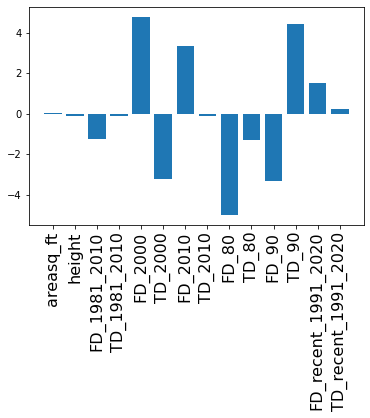

In [13]:
plt.bar(imp_feature_table['predictors'], imp_feature_table['coefficients'])
plt.xticks(rotation=90, fontsize=16)

In [14]:
# Decision tree

dt = DecisionTreeRegressor(random_state=3).fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [15]:
# Random Forest Regressor

rf = RandomForestRegressor(max_depth=15, random_state=3)
rf.fit(X_train, y_train.reshape(len(y_train)))

y_pred_rf = rf.predict(X_test)

In [16]:
mse_lm = mean_squared_error(y_test, y_pred_lm)
print("MSE model_linear:", mse_lm)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("MSE model_ridge:", mse_ridge)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("MSE model_dt:", mse_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("MSE model_rf:", mse_rf)

MSE model_linear: 0.9355677401238724
MSE model_ridge: 0.9359106176815764
MSE model_dt: 1.691196696702023
MSE model_rf: 0.8665833815513895


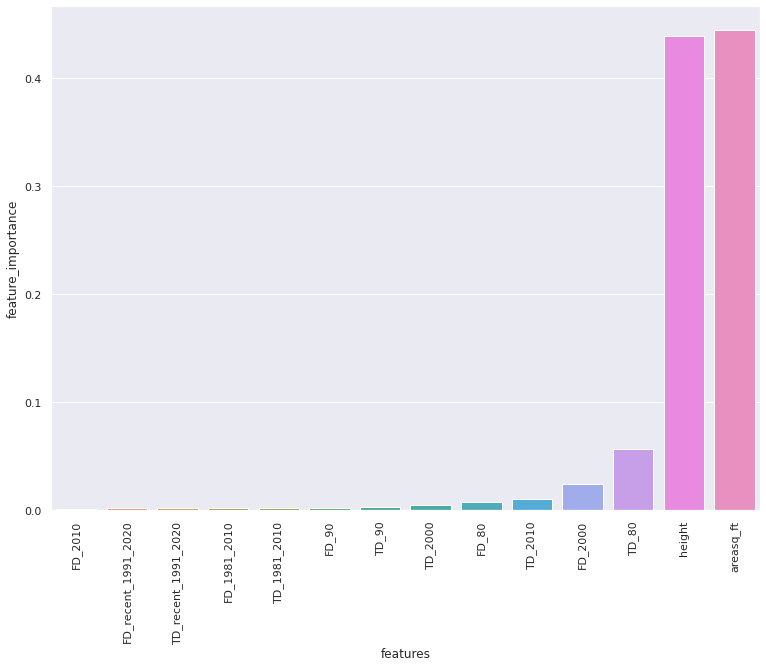

In [17]:
# # Displaying features with their importances from decision tree

f = pd.DataFrame({'features' : list(features_kept), 'feature_importance' : list(dt.feature_importances_ )})
f = f.sort_values(by = 'feature_importance')

sns.set(rc={'figure.figsize':(12.7,9.27)})

barplot = sns.barplot(x='features', y = 'feature_importance', data = f)

ticks = barplot.set_xticklabels(barplot.get_xticklabels(),rotation = 90)

# Predicted Output - total btu

In [18]:
# Create numpy arrays for scikit learn (putting age_yrs back as predictor)

features_dropped = ['annual_btu_persqft', 'annual_btu', 'age', 'osm_id', 'zip_code', 'zip_group']
features_kept = building_features_nonmissing.drop(features_dropped, axis=1).columns

X = np.array(building_features_nonmissing.drop(features_dropped, axis=1))

y = np.array(building_features_nonmissing['annual_btu'])
y = y.reshape([y.shape[0],1])

In [19]:
# Scale X

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

print(X)

[[-2.36647622e-01 -1.36319468e+00  6.30103054e-01 ...  6.24785266e-01
  -4.27196025e-01 -6.55471735e-01]
 [ 5.60365535e-01 -1.40887797e+00 -1.82141606e+00 ... -1.83340954e+00
  -8.28775438e-01  4.68359044e-01]
 [-2.49227319e-01 -1.72916194e+00 -1.62415591e+00 ... -1.64795878e+00
   2.05128845e+00  6.74235544e-01]
 ...
 [-1.89331561e-01 -1.43274316e-02  6.30103054e-01 ...  6.24785266e-01
  -4.27196025e-01 -1.82818238e+00]
 [-1.53472145e-01 -4.06869950e-01  6.30103054e-01 ...  6.24785266e-01
  -4.27196025e-01 -1.82818238e+00]
 [-2.72891665e-01 -6.33809416e-01 -2.43415856e-02 ... -1.67554736e-03
   1.67421160e+00 -1.82818238e+00]]


In [20]:
# Scale y

scaler = StandardScaler()
scaler.fit(y)
y = scaler.transform(y)

print(y)

[[-0.24278597]
 [ 0.61673398]
 [-0.22906071]
 ...
 [-0.22946559]
 [-0.20496812]
 [-0.28654992]]


In [21]:
# Divide intro training and testing datasets, with a 30-70 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [22]:
# Linear Regression


lm = LinearRegression()
lm.fit(X_train,y_train)

y_pred_lm = lm.predict(X_test) # predicting using train dataset

coeffs = lm.coef_
print(coeffs)

[[ 1.00008502e+00 -1.93452093e-03  1.04360982e+10 -6.06203891e+10
   1.18970783e+10 -6.90452970e+10  1.43811100e+10 -1.09349120e+11
  -3.52597868e+09  1.91989541e+10  1.23124059e+10 -6.35691296e+10
  -4.54950646e+10  2.60559111e+11  3.42317267e-02]]


In [23]:
# Ridge Regression

ridge = Ridge(alpha= 0.5)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
coeffs = ridge.coef_
print(coeffs)

[[ 1.00009793 -0.00203164  0.00142633 -0.00410093  0.05992798 -0.01839554
  -0.00469907  0.02027931  0.05380313  0.02546026 -0.1076463  -0.01632988
  -0.01878925 -0.00317812  0.0342321 ]]


In [24]:
# Ridge Regression with Cross Validation

ridgeCV = RidgeCV(cv=10).fit(X_train, y_train)

y_pred_ridgeCV = ridgeCV.predict(X_test)
coeffs = ridgeCV.coef_
print(coeffs)

[[ 0.9999119  -0.00201878 -0.0031771  -0.00179395  0.0047484  -0.01265164
   0.00524509  0.01072829  0.00148576  0.02267323 -0.01551225 -0.01304764
  -0.00214234 -0.00412147  0.0342443 ]]


In [25]:
# Displaying features with their coefficients from ridge


imp_feat = SelectFromModel(ridgeCV, prefit = True, threshold = 0) 

imp_index = imp_feat.get_support()

imp_feature_table = pd.DataFrame({'predictors':features_kept, 'coefficients': list(ridgeCV.coef_[0])})[imp_index]

print(f'There are {len(imp_feature_table)} features')

imp_feature_table

There are 15 features


,predictors,coefficients
0,areasq_ft,0.999912
1,height,-0.002019
2,FD_1981_2010,-0.003177
3,TD_1981_2010,-0.001794
4,FD_2000,0.004748
5,TD_2000,-0.012652
6,FD_2010,0.005245
7,TD_2010,0.010728
8,FD_80,0.001486
9,TD_80,0.022673


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

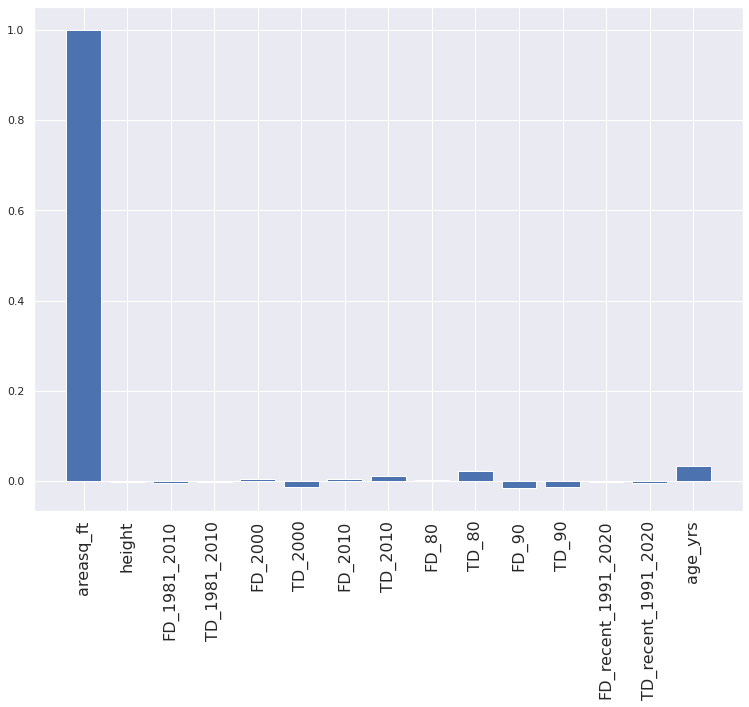

In [26]:
plt.bar(imp_feature_table['predictors'], imp_feature_table['coefficients'])
plt.xticks(rotation=90, fontsize=16)

In [27]:
# Decision tree

dt = DecisionTreeRegressor(random_state=3, max_depth=15).fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [28]:
# Random Forest Regressor

rf = RandomForestRegressor(max_depth=15, random_state=3)
rf.fit(X_train, y_train.reshape(len(y_train)))

y_pred_rf = rf.predict(X_test)

In [29]:
mse_lm = mean_squared_error(y_test, y_pred_lm)
print("MSE model_linear:", mse_lm)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("MSE model_ridge:", mse_ridge)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("MSE model_dt:", mse_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("MSE model_rf:", mse_rf)

MSE model_linear: 0.010462597699792917
MSE model_ridge: 0.010463997854820134
MSE model_dt: 0.014887890152261551
MSE model_rf: 0.0056543034853485325


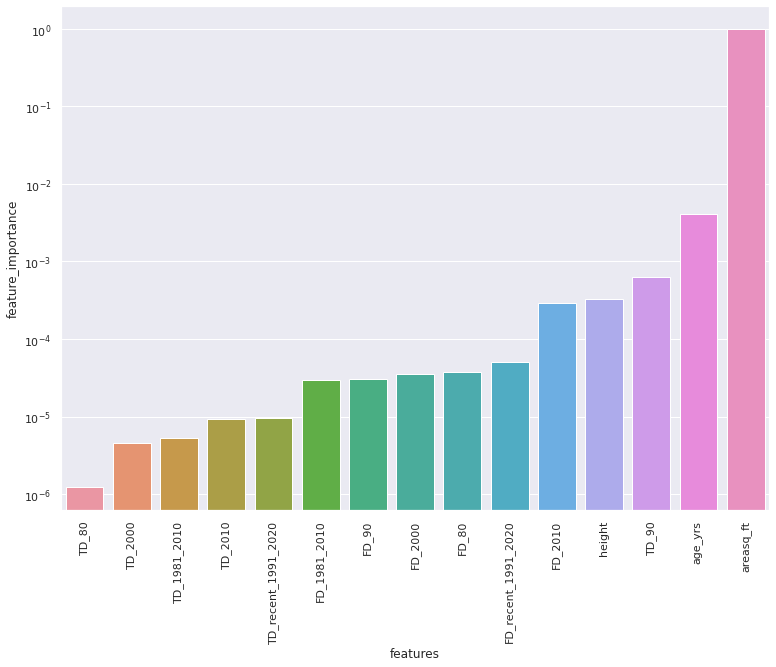

In [33]:
# # Displaying features with their importances from decision tree

f = pd.DataFrame({'features' : list(features_kept), 'feature_importance' : list(dt.feature_importances_ )})
f = f.sort_values(by = 'feature_importance')

sns.set(rc={'figure.figsize':(12.7,9.27)})

barplot = sns.barplot(x='features', y = 'feature_importance', data = f)
barplot.set_yscale('log')

ticks = barplot.set_xticklabels(barplot.get_xticklabels(),rotation = 90)